In [1]:
import pandas as pd
import numpy as np

data= pd.read_csv('data.csv')
sources = data.groupby('source').size()
print(sources)
print(np.sum(sources.values))

source
Milliyet             2162
SABAH                2261
aa                     62
bantmag.com           103
bbcturk               230
btchaber              120
campaigntr             64
capital               182
diken                 114
donanimhaber          383
ekonomim.haber       1263
eksiseyler.com        156
euronews              228
gazeteduvar           139
gazetoksijen          814
haberturk            1233
hurriyet              508
indyturk              401
livetobloom.com        13
mediacat.com           67
oggusto                20
pazarlamasyon           9
sozcu                 623
static.bundle.app       6
uplifers               82
dtype: int64
11243


In [7]:
import pandas as pd
import nltk
nltk.download('punkt')
data = pd.read_csv("trainedilmis.csv")
data['content'] = data['content'].astype(str).str.lower()
import zeyrek
from IPython.utils import io
analyzer = zeyrek.MorphAnalyzer()
def lemmatize(metin):
    with io.capture_output() as captured:
        x = analyzer.lemmatize(metin);
    y = ' '.join([tuple_[1][0] for tuple_ in x])
    return y
    
filtered_data = data[data['pseudo_label'] == 1]
# content sütununu lemmatize et
filtered_data['coontent_lemmatize'] = filtered_data['cleaned_text'].apply(lemmatize)
#lemmatize("eğer bir cin tarafından kandırılıyorsam var olduğuma bir delalet mi")

[nltk_data] Downloading package punkt to /home/mehmet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_12164/3336581127.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['coontent_lemmatize'] = filtered_data['cleaned_text'].apply(lemmatize)


In [46]:
import re
def kesme_isaretlerini_kaldir(metin):
    return re.sub(r"[’'\r\n’’" ")]", "", metin)
data['content'] = data['content'].apply(kesme_isaretlerini_kaldir)

In [27]:
import spacy
import string
# Türkçe dil modelini yükleme
nlp = spacy.blank("tr")
def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if token.text not in string.punctuation]
    return tokens

data['content-token'] = data['content'].apply(tokenize_text)
data

,Unnamed: 0,source,content,date,cleaned_text,pseudo_label,content-token
0,0,sozcu,"i̇srail, vatandaşlarına yurt dışı seyahatler...",11-3-2023,i̇srail vatandaşlarına yurt dışı seyahatleri...,0,"[ , i̇srail, vatandaşlarına, yurt, dışı, seya..."
1,1,euronews,by euronews yayınlanma tarihi 03/11/2023 - 18:...,11-3-2023,by euronews yayınlanma tarihi 03 11 2023 18 ...,0,"[by, euronews, yayınlanma, tarihi, 03/11/2023,..."
2,2,sozcu,"fransa dışişleri bakanlığı, i̇srailin düzenled...",11-3-2023,fransa dışişleri bakanlığı i̇srailin düzenled...,0,"[fransa, dışişleri, bakanlığı, i̇srailin, düze..."
3,3,gazeteduvar,"duvar - türkiye futbol federasyonu, galatasar...",11-3-2023,duvar türkiye futbol federasyonu galatasar...,-1,"[ , duvar, türkiye, futbol, federasyonu, , ga..."
4,4,euronews,by euronews yayınlanma tarihi 03/11/2023 - 15:...,11-3-2023,by euronews yayınlanma tarihi 03 11 2023 15 ...,0,"[by, euronews, yayınlanma, tarihi, 03/11/2023,..."
...,...,...,...,...,...,...,...
12531,12531,haberturk,"i̇bb meclisi mayıs ayı üçüncü toplantısı, mecl...",05-27-2024,i̇bb meclisi mayıs ayı üçüncü toplantısı mecl...,0,"[i̇bb, meclisi, mayıs, ayı, üçüncü, toplantısı..."
12532,12532,haberturk,"cumhurbaşkanı recep tayyip erdoğan, eski yargı...",05-27-2024,cumhurbaşkanı recep tayyip erdoğan eski yargı...,0,"[cumhurbaşkanı, recep, tayyip, erdoğan, eski, ..."
12533,12533,haberturk,i̇zmir 8. ağır ceza mahkemesindeki duruşmaya t...,05-27-2024,i̇zmir 8 ağır ceza mahkemesindeki duruşmaya t...,0,"[i̇zmir, 8., ağır, ceza, mahkemesindeki, duruş..."
12534,12534,haberturk,niğde cumhuriyet başsavcılığı koordinesinde i̇...,05-27-2024,niğde cumhuriyet başsavcılığı koordinesinde i̇...,0,"[niğde, cumhuriyet, başsavcılığı, koordinesind..."


In [24]:
filtered_data.to_csv("cevrehaberlerilemmatize.csv")

In [28]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("turkish")
stopwords1 = ['bir', 'nin', 'olan', 'göre',
              'bin', 'kadar', 'olduğu', 'nın',
              'tarafından', 'devam','yer', 
              'önce','olduğunu','ilk','aynı','yüzde',
              'olarak', 'fazla','son','milyon','var', 
              'yıl','yeni', 'ancak','açıklamada','geçen','genel','halt','hak'
              'iki','ilgili', 'deki','den','etti','oldu','diğer','yen', 'hal','altı','orta',
              'değil','kendi','sonra','gelen',',','iyi', 'birlikte','şekilde','ardından',
              'arasında','eden', 'yönelik', 'üzere', 'zaman','ilişkin', 'alt', 'Aras', 'Açıklamak','Binmek'
              'başkanı','gün','ekim','kasım','yüksek','milyar','büyük','yapılan','sahip','olmak',
              'üzerinde', 'sadece','karşı', 'içinde', 'farklı', 'tek','dan', 'kişi','caddesi','alan',
                'yılın', 'nun', 'oranı','hakkında','yılında','eylül', 'bunun','uzun','bugün', 'yemek','başka', 'genelmek', 'söz',
              'yüz', ' ', '“', '”', 'etmek', 'yılmak', 'yapmak' ,'ilmek', 'demek', 'almak', 'ara', 'bun', 'sağ','ala',
              'yermek' ,'Kadar','belirmek','şirket','gelmek','varmak','açıklama','vermek','çalışmak','konu','üzeri','ifade',
              'ben', 'durum', 'art', 'haber', 'azalmak', 'yan', 'açık', 'karmak', 'döne', 'par','söylemek','önem','yük','ilgi'
              ,'saat','kul','başlamak','kalmak','etki','kas','insan','ilişki','bölge','ilgi','yok','sıra','şekil','yok','ayn',
              'yol','baş','bulunmak','görmek', 'hafta','yaşamak','Deva','yapılanmak','hayat','ön','is','istemek','İlgi', 'iç', 'imek','binmek','Gerçek','iki','faz'
             ]
stopwords = stopwords+stopwords1
data['content-token'] = data['content-token'].apply(lambda x: [item for item in x if item not in stopwords])
data['content-token']

[nltk_data] Downloading package stopwords to /home/mehmet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        [  , i̇srail, vatandaşlarına, yurt, dışı, seya...
1        [by, euronews, yayınlanma, tarihi, 03/11/2023,...
2        [fransa, dışişleri, bakanlığı, i̇srailin, düze...
3        [duvar, türkiye, futbol, federasyonu,  , galat...
4        [by, euronews, yayınlanma, tarihi, 03/11/2023,...
                               ...                        
12531    [i̇bb, meclisi, mayıs, ayı, üçüncü, toplantısı...
12532    [cumhurbaşkanı, recep, tayyip, erdoğan, eski, ...
12533    [i̇zmir, 8., ağır, ceza, mahkemesindeki, duruş...
12534    [niğde, cumhuriyet, başsavcılığı, koordinesind...
12535    [cikcilli, mahallesi'nde, inşaatın, beşinci, k...
Name: content-token, Length: 12536, dtype: object

In [9]:
data['content-string'] = data['content-token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

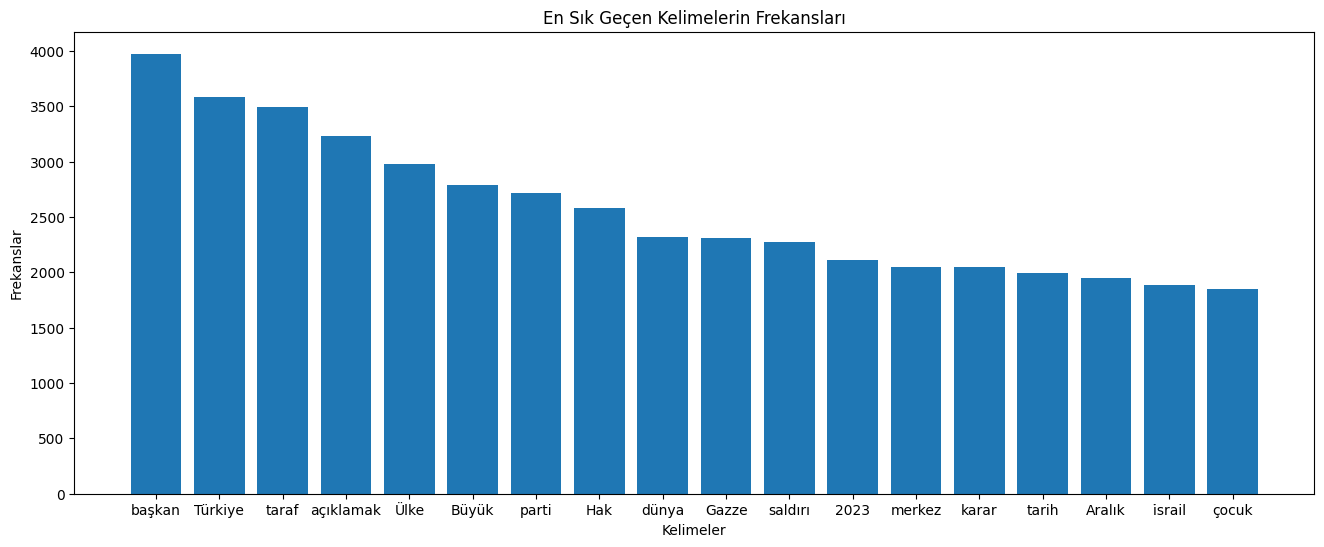

In [25]:
all_words = ' '.join([word for word in data['content-string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words)
import matplotlib.pyplot as plt

top_words = fdist.most_common(18)

words, frequencies = zip(*top_words)

fig, ax = plt.subplots(figsize=(16,6))

ax.bar(words, frequencies)

ax.set_xlabel('Kelimeler')
ax.set_ylabel('Frekanslar')

ax.set_title('En Sık Geçen Kelimelerin Frekansları')

plt.show()

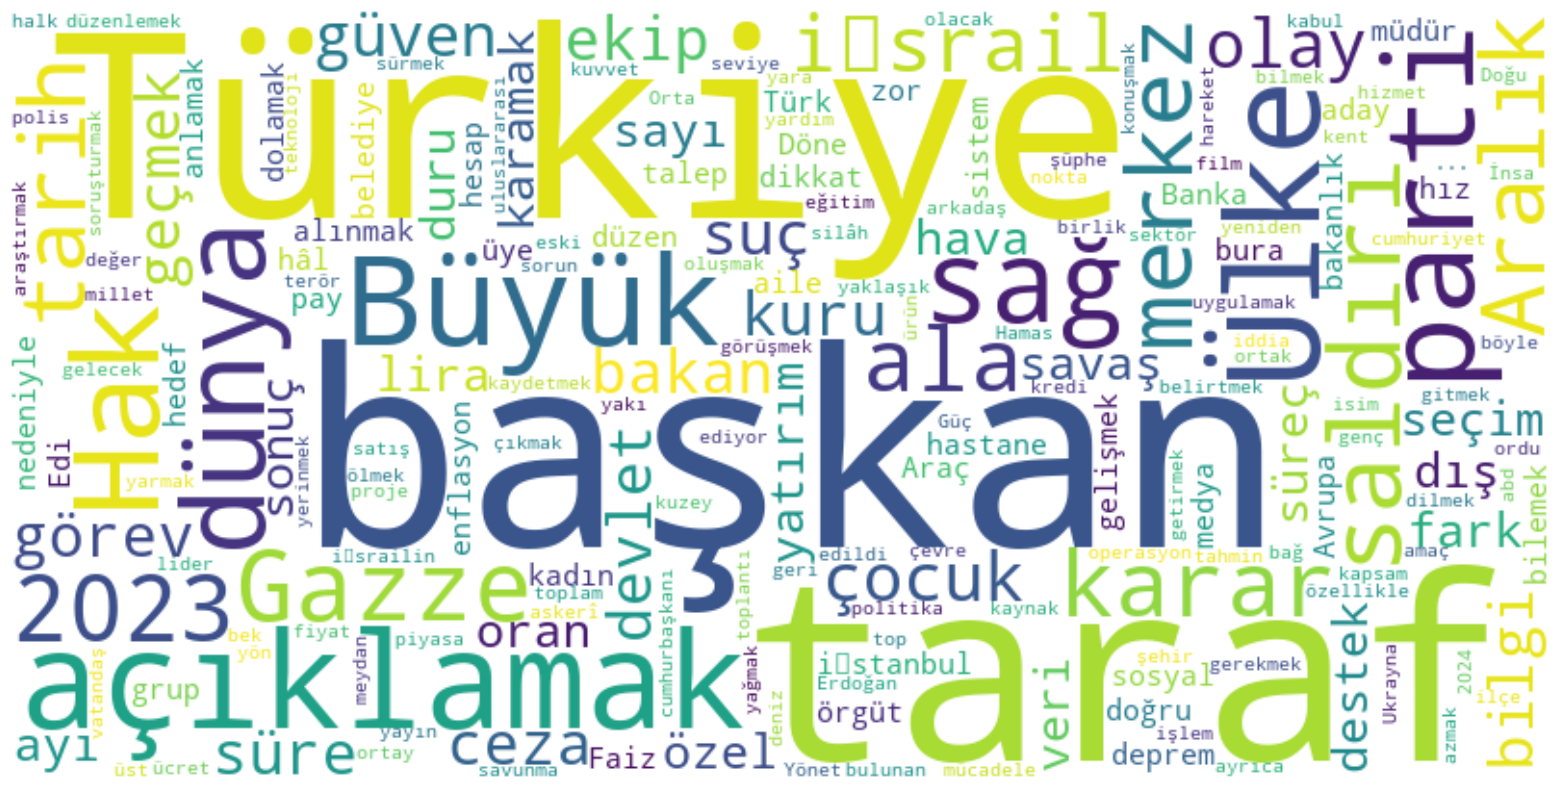

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)

# WordCloud'u görselleştir
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
from gensim import corpora, models, similarities 
import gensim

ImportError: cannot import name 'triu' from 'scipy.linalg' (/home/mehmet/.local/lib/python3.12/site-packages/scipy/linalg/__init__.py)

In [11]:
tokenized = data['content-token']
dictionary = corpora.Dictionary(tokenized)
dictionary.filter_extremes(no_below=1, no_above=0.8)
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized]

In [42]:
from gensim.models.coherencemodel import CoherenceModel
num_topics_range = [6, 8, 10, 12, 15]
passes_range = [1, 5]
iterations_range = [50, 100]
best_params = {}
for num_topics in num_topics_range:
    for passes in passes_range:
        for iterations in iterations_range:
            # LDA modelini eğit
            lda_model = models.LdaModel(corpus, num_topics=num_topics, 
                                        id2word=dictionary, passes=passes,
                                        iterations=iterations) 
            # Cohere1nce skorunu hesapla
            coherence_model = CoherenceModel(model=lda_model, corpus=corpus,
                                             dictionary=dictionary, coherence='u_mass')
            score = coherence_model.get_coherence()
            print(score)
            params = {'num_topics': num_topics, 'passes': passes, 'iterations': iterations}
            print(params)

-1.469447314789436
{'num_topics': 6, 'passes': 1, 'iterations': 50}
-1.7905906748163476
{'num_topics': 6, 'passes': 1, 'iterations': 100}
-1.7046139565947882
{'num_topics': 6, 'passes': 5, 'iterations': 50}
-1.8305063655809628
{'num_topics': 6, 'passes': 5, 'iterations': 100}
-1.5500363788181586
{'num_topics': 8, 'passes': 1, 'iterations': 50}
-1.7220413439494635
{'num_topics': 8, 'passes': 1, 'iterations': 100}
-1.6829208053023832
{'num_topics': 8, 'passes': 5, 'iterations': 50}
-1.4472977767725375
{'num_topics': 8, 'passes': 5, 'iterations': 100}
-1.6865911936721436
{'num_topics': 10, 'passes': 1, 'iterations': 50}
-1.9107752398048343
{'num_topics': 10, 'passes': 1, 'iterations': 100}
-2.355179807829212
{'num_topics': 10, 'passes': 5, 'iterations': 50}
-1.9762305656590216
{'num_topics': 10, 'passes': 5, 'iterations': 100}
-2.219614698652187
{'num_topics': 12, 'passes': 1, 'iterations': 50}
-1.9287976798211632
{'num_topics': 12, 'passes': 1, 'iterations': 100}
-1.5908768836942837
{'nu

In [12]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics =50, 
                                           id2word=dictionary, passes=5, 
                                           iterations=500)
ldamodel.save('mOdel.gensim')
topics = ldamodel.print_topics(num_words=30)

In [71]:
coherence_model = CoherenceModel(model=ldamodel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
print(coherence_model.get_coherence())

-1.4891348559915392


In [15]:
topics

[(6,
  '0.076*"bayraktar" + 0.048*"test" + 0.034*"uçuşmak" + 0.026*"alım" + 0.026*"Selçuk" + 0.023*"testi" + 0.021*"Baykar" + 0.020*"hava" + 0.012*"satım" + 0.012*"si̇ha" + 0.010*"03" + 0.010*"Başar" + 0.009*"i̇ha" + 0.009*"füze" + 0.008*"gelişmek" + 0.008*"kabiliyet" + 0.008*"sefer" + 0.007*"tb3" + 0.007*"Eroğlu" + 0.007*"bozkurt" + 0.007*"tabip" + 0.007*"i̇nce" + 0.006*"keşif" + 0.006*"2023te" + 0.005*"kalkışmak" + 0.005*"muzaffer" + 0.005*"iniş" + 0.005*"Tcg" + 0.005*"Anadol" + 0.004*"rezidans"'),
 (9,
  '0.037*"ceza" + 0.031*"suç" + 0.025*"sanık" + 0.020*"tutuk" + 0.015*"il" + 0.015*"hapis" + 0.012*"duruşma" + 0.012*"mahkeme" + 0.011*"olay" + 0.011*"ağır" + 0.010*"öldürmek" + 0.010*"avukat" + 0.009*"Ay" + 0.009*"şüphe" + 0.008*"dava" + 0.008*"Mahkemesi" + 0.007*"cezaevi" + 0.007*"talep" + 0.007*"kasten" + 0.006*"ad" + 0.006*"Sav" + 0.006*"kararmak" + 0.006*"soruşturmak" + 0.005*"cinayet" + 0.005*"et" + 0.005*"Hak" + 0.005*"3" + 0.005*"iddianame" + 0.005*"rapor" + 0.005*"2"'),
 (28,

In [73]:
get_document_topics = ldamodel.get_document_topics(corpus[0], minimum_probability=0.0, minimum_phi_value=None, per_word_topics=False)
print(get_document_topics)

[(0, 0.007365761), (1, 0.0073649357), (2, 0.12851824), (3, 0.0073685725), (4, 0.32266632), (5, 0.007370356), (6, 0.007361697), (7, 0.5119841)]


In [ ]:
def find_max_topic_for_document(doc, ldamodel):
    get_document_topics = ldamodel.get_document_topics(doc,  minimum_probability=0.0)
    second_elements = [item[1] for item in get_document_topics]
    max_value = max(second_elements)
    num_topic = second_elements.index(max_value)
    return num_topic

# Her doküman satırı için num_topic leri bulup veride yerine koyalım
data['num_topic'] = [find_max_topic_for_document(doc, ldamodel) for doc in corpus]
data

KeyboardInterrupt: 

In [9]:
data.to_csv('data.csv', index=False)

In [124]:
environmental_key = [ 
    "acı su", "çöp dökme", "açık alan", "açık boşaltma", "afet", "ağır metaller", "karbon", "sular", "amonyak", "telef", "çürüme",  "kirliliği",
    "kirlilik", "madde", "atık", "atık su", "atmosfer", "azot","baca", "atıklari", "baca dumanı", "gaz", "kükürt", "bakteri", "benzen", "deprem",
    "besin zinciri", "besin", "radyasyon", "birincil hava kirleticiler", "bitki", "öldürücü", "biyojeokimyasal döngü",
    "oksijen", "biyokütle", "enerji", "arıtma", "biyolojik çesitlilik", "denge", "biyosfer", "civa", "çamur", "çevre", "çevre dostu", "çevre koruma",
    "çevre mühendisliği", "çevre yönetimi", "çevresel etki raporu", "çevrilme", "çökeltme tanki", "çöllesme", "çöp", "oksijen", "dalgakiran",
    "damıtma tesisleri", "filtre", "deterjanlar", "dezenfeksiyon", "doğa", "doğal gaz", "doğal kaynak", "ekoloji", "ekosfer", "ekosistem", "elektrodiyaliz",
    "emisyon", "endüstriyel", "enerji dönüşümü", "epa", "erozyon", "evsel atık", "su arıtımı", "flora","fosil yakıt", "fotosentez",
    "fosil", "hava kalite", "hava kalitesi", "hava kirliliği", "sülfür",  "döngü", "müsilaj", "iyonosfer",
    "jeosfer", "karbon döngüsü", "karbon", "karbon dioksit", "karbon monoksit", "katı atık","kimyasal kirlilik", "kimyasal", "klor", "tarım", "kullanma suyu",
    "kurşun", "kurum", "metan", "mezosfer", "mikrobesinler", "mikroorganizmalar", "mikrop", "genler", "mutasyon", "madde", 
    "ormancılık", "ortam gürültüsü", "hava", "orman", "hayvan", "ozon", "ozon tabakası", "ozonosfer", "sıcaklık", "mevsim", "petrol", "sızıntı", "peyzaj düzenlemesi", "sızıntısı",
    "radon", "radyasyon", "radyoaktif atık", "rüzgar enerjisi", "rüzgar", "uranyum", "sentetik",
    "gaz", "septik", "serpinti", "sızıntı", "sis", "siyah duman", "asit" "siyah yağmur", "sel", "dolu", "stratosfer",    "ağaçlandırma",  "akarsu kirliliği", "atık yönetimi", "atmosferik koşullar", "biyoçeşitlilik",
    "biyolojik denge", "biyoyakıt", "çevre bilimi",  "çevre dostu", "çevre etkisi", "çevre", "koruma", "deniz kirliliği", "doğa koruma", "doğal afetler",
    "doğal kaynaklar", "ekolojik ayak izi", "dengesizlik", "bozulma", "endüstriyel", "enerji etkinliği", "enerji kaynakları",
    "gürültü kirliliği", "hava kirliliği", "iklim değişikliği", "atık yönetimi", "küresel ısınma", "orman yangınları",
    "plastik", "orman", "sıfır atık", "sürdürülebilir kalkınma", "sürdürülebilirlik", "tarım ilaçları", "erozyon",
    "erazyonu", "yenilenebilir enerji", "çevre dostu", "çevre eğitimi", "çevre sağlığı",
    "çevresel adalet", "çevresel etki", "çevresel riskler", "çevre bilinci", "doğal kaynak koruma", "hava temizliği", "iklim politikası",
    "iklim sistemleri", "iklim değişimi etkileri", "katı atık geri dönüşümü", "karbon ayak izi",
    "kozmetik kirliliği", "kuraklık yönetimi", "orman koruma", "plastik atık yönetimi",
    "radyasyon etkileri", "sürdürülebilir çevre", "sürdürülebilir gelişim", "tarım ilaçları zararları", "toprak kirliliği",
    "yangın", "çevre bilimciler", "çevre etiği", "çevre mühendisliği", "çevre politikaları", "çevre risk analizi", "tahribatı", "tahribat",
    "iklim", "çevresel etkiler", "çevresel kimlik", "çevresel krizler", "çevresel mühendislik", "çevresel planlar", "yıkım", "doğa kirliliği", "doğal afet", "iklim değişikliği çözümleri", "iklim eylemi", "iklim hedefleri"]

import re
key = ["su", 'çevre']

def extract_keywords(data, keywords):
    result_text = []
    keyword_text = []
    source = []
    print("he")
    for j, sentence in enumerate(data['content']):  
        i = 0
        kelimeler = sentence.split()
        keys = []
        for keyword in keywords:
            if keyword in kelimeler:
                i = i+1
                keys.append(keyword)
                if i > 3:
                    result_text.append(sentence)
                    keyword_text.append(keys)
                    source.append(data.iloc[j]['source'])
                    break
    df = pd.DataFrame({'Content': result_text, 'Keywords': keyword_text, 'Source': source})
    return df
data= pd.read_csv('birlesik_df.csv')

df = extract_keywords(data, environmental_key)
df

he


,Content,Keywords,Source
0,Türkiye Cumhuriyet Merkez Bankası (TCMB Başkan...,"[gaz, enerji, petrol, gaz]",indyturk
1,"Osmanlı İmparatorluğu, devraldığı İslami anlay...","[sular, tarım, hava, sel]",indyturk
2,ANTALYA - Sağlık ve Sigorta Yöneticileri Dern...,"[afet, deprem, çevre, ekosistem]",gazeteduvar
3,"Ralf Schumacher, kardeşi Michael Schumacherin ...","[sular, tarım, hava, sel]",indyturk
4,New Yorktaki Amerikan Dış İlişkiler Konseyinin...,"[sular, tarım, hava, sel]",indyturk
...,...,...,...
332,Beşiktaş'ta 'Masquerade' isimli gece kulübünde...,"[oksijen, oksijen, kimyasal, yangın]",Milliyet
333,"İvedikköy Mahallesi, 3874'üncü Cadde'de buluna...","[atık, çevre, hayvan, çevre]",Milliyet
334,Semiha Şahin'e yangının perde arkasını anlatan...,"[madde, oksijen, oksijen, madde]",Milliyet
335,\r\n\r\nCumhurbaşkanı Recep Tayyip Erdoğan'ın ...,"[atık, çevre, çevre, koruma]",SABAH


In [126]:
df.to_csv("kelimecıkartmayöntemleriuygulanmıscevrehaberleri.csv")

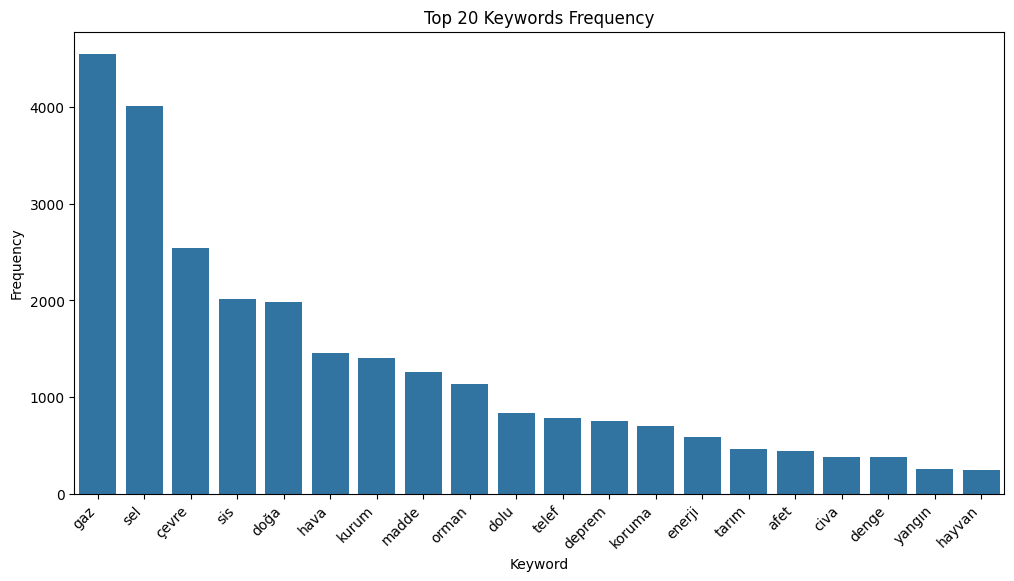

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns


def extract_keywords(sentence, keywords):
    return [keyword for keyword in keywords if keyword in sentence]

# Count the occurrence of each keyword in the dataset
keyword_counts = {}
for sentence in data['content']:
    keywords_found = extract_keywords(sentence.lower(), environmental_key)
    for keyword in keywords_found:
        if keyword in keyword_counts:
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1

# Create DataFrame from keyword counts
keyword_df = pd.DataFrame.from_dict(keyword_counts, orient='index', columns=['count'])
keyword_df.index.name = 'keyword'
keyword_df.sort_values(by='count', ascending=False, inplace=True)

# Plot keyword counts
plt.figure(figsize=(12, 6))
sns.barplot(x=keyword_df.index[:20], y=keyword_df['count'][:20])
plt.title('Top 20 Keywords Frequency')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.show()

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("trainedilmis.csv")

def category_ngram(category, n):
    temp_df = df[df['pseudo_label'] == category]
    
    word_vectorizer = CountVectorizer(ngram_range=(n, n), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(temp_df['content'])
    
    frequencies = sparse_matrix.sum(axis=0).A1
    
    return pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])\
            .sort_values(by='frequency', ascending=False) \
            .reset_index() \
            .head(10)

print(category_ngram(1, 3))

                      index  frequency
0            ve çok bulutlu        617
1  geçeceği tahmin ediliyor        529
2           cparçalı ve çok        474
3     gök gürültülü sağanak        387
4   yağışlı geçeceği tahmin        366
5          ve gök gürültülü        308
6            sağanak ve gök        306
7         yağmur ve sağanak        288
8      karla karışık yağmur        253
9         karışık yağmur ve        241


In [11]:
print(category_ngram(0, 3))

                         index  frequency
0         recep tayyip erdoğan        866
1        belediye başkan adayı        828
2      sosyal medya hesabından        601
3                 bir kez daha        505
4   cumhurbaşkanı recep tayyip        442
5                   31 mart ta        434
6  büyükşehir belediye başkanı        433
7   büyükşehir belediye başkan        400
8              pic twitter com        391
9            başta olmak üzere        386


In [15]:
df

,Unnamed: 0,source,content,date,cleaned_text,pseudo_label
0,0,sozcu,"İsrail, vatandaşlarına yurt dışı seyahatleri...",11-3-2023,i̇srail vatandaşlarına yurt dışı seyahatleri...,0
1,1,euronews,By euronews Yayınlanma Tarihi 03/11/2023 - 18:...,11-3-2023,by euronews yayınlanma tarihi 03 11 2023 18 ...,0
2,2,sozcu,"Fransa Dışişleri Bakanlığı, İsrailin düzenledi...",11-3-2023,fransa dışişleri bakanlığı i̇srailin düzenled...,0
3,3,gazeteduvar,"DUVAR - Türkiye Futbol Federasyonu, Galatasar...",11-3-2023,duvar türkiye futbol federasyonu galatasar...,-1
4,4,euronews,By euronews Yayınlanma Tarihi 03/11/2023 - 15:...,11-3-2023,by euronews yayınlanma tarihi 03 11 2023 15 ...,0
...,...,...,...,...,...,...
12531,12531,haberturk,"İBB Meclisi mayıs ayı üçüncü toplantısı, Mecli...",05-27-2024,i̇bb meclisi mayıs ayı üçüncü toplantısı mecl...,0
12532,12532,haberturk,"Cumhurbaşkanı Recep Tayyip Erdoğan, eski Yargı...",05-27-2024,cumhurbaşkanı recep tayyip erdoğan eski yargı...,0
12533,12533,haberturk,İzmir 8. Ağır Ceza Mahkemesindeki duruşmaya tu...,05-27-2024,i̇zmir 8 ağır ceza mahkemesindeki duruşmaya t...,0
12534,12534,haberturk,Niğde Cumhuriyet Başsavcılığı koordinesinde İl...,05-27-2024,niğde cumhuriyet başsavcılığı koordinesinde i̇...,0


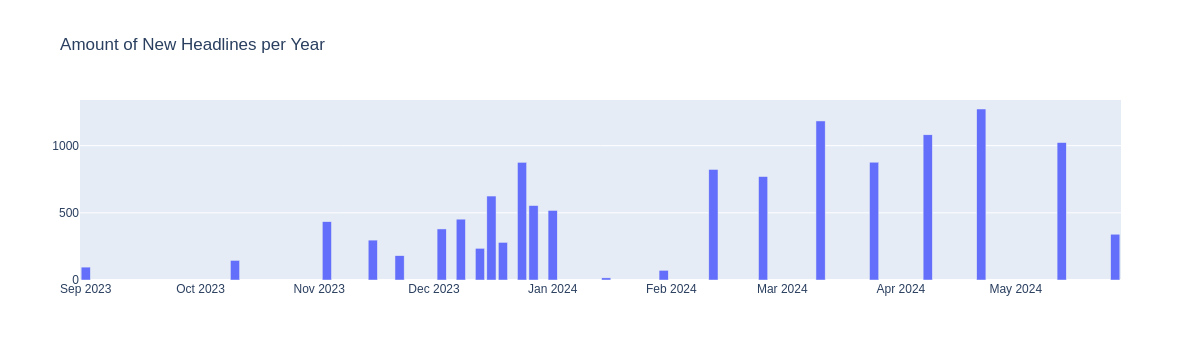

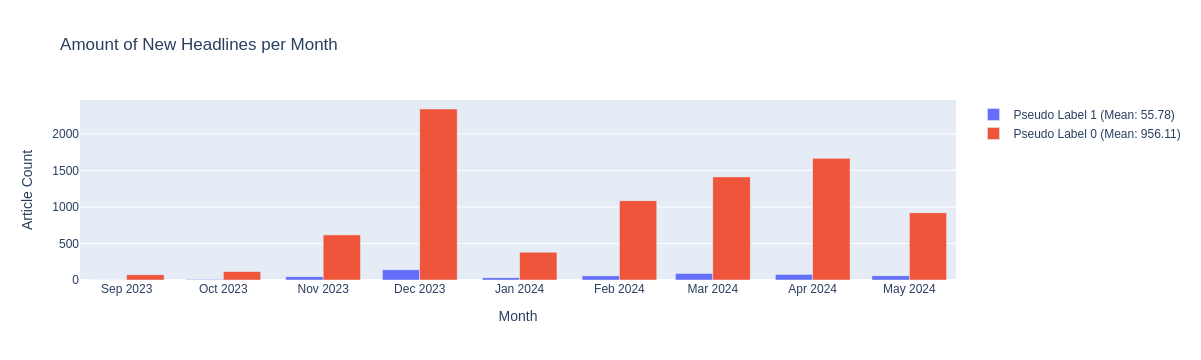

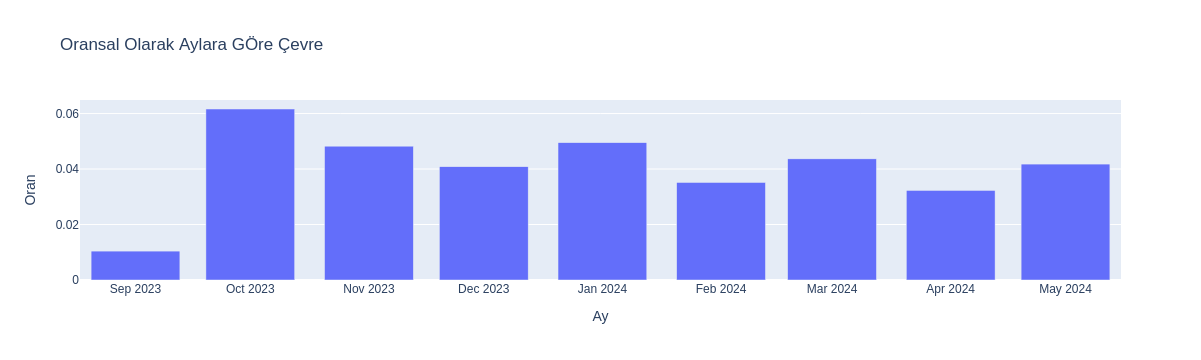

In [99]:
import pandas as pd
import plotly.graph_objs as go


df=pd.read_csv('trainedilmis.csv')
df['date'] = df['date'].replace({
    '2022-2023Q2': '2023-10-10',
    '2017': '2023-09-01',
    '11-3-2023':'2023-11-03',
    '11-15-2023':'2023-11-15',
    '11-22-2023':'2023-11-22',
    '12-08-2023':'2023-12-08',
    '12-03-2023':'2023-12-03',
    '12-16-2023':'2023-12-16',
    '01-09-2023':'2023-09-01',
    '12-13-2023':'2023-12-13',
    '12-19-2023':'2023-12-19',
    '12-27-2023':'2023-12-27',
    '12-24-2023':'2023-12-24',
    '05-13-2024':'2024-05-13',
    '05-20-2024':'2024-05-20',
    '05-27-2024':'2024-05-27',
    
})
# Değiştir


yearly_d = df.date.value_counts()
fig = go.Figure()
fig.add_trace(go.Bar(x=yearly_d.index,y=yearly_d.values,name='Article Count'))


fig.update_layout(title='Amount of New Headlines per Year')


fig.show()

df['date'] = pd.to_datetime(df['date'])
monthly_avg = df.resample('M', on='date').size().mean()

fig = go.Figure()
fig.add_trace(go.Bar(x=df.resample('M', on='date').size().index.strftime('%Y-%m'), 
                     y=df.resample('M', on='date').size().values,
                     name='Article Count'))
fig.add_trace(go.Scatter(x=df.resample('M', on='date').size().index.strftime('%Y-%m').unique(), 
                         y=[monthly_avg] * len(df.resample('M', on='date').size().index.strftime('%Y-%m').unique()),
                         mode='lines', name='Monthly Average'))

fig.update_layout(title='Amount of New Headlines per Month',
                  xaxis_title='Month',
                  yaxis_title='Article Count')

fig.show


df_1 = df[df['pseudo_label'] == 1]
df_0 = df[df['pseudo_label'] == 0]


monthly_d_1 = df_1.resample('M', on='date').size()
monthly_d_0 = df_0.resample('M', on='date').size()

monthly_avg_1 = monthly_d_1.mean()
monthly_avg_0 = monthly_d_0.mean()

fig = go.Figure()
fig.add_trace(go.Bar(x=monthly_d_1.index.strftime('%Y-%m'), y=monthly_d_1.values,
                     name='Pseudo Label 1 (Mean: {:.2f})'.format(monthly_avg_1)))
fig.add_trace(go.Bar(x=monthly_d_0.index.strftime('%Y-%m'), y=monthly_d_0.values,
                     name='Pseudo Label 0 (Mean: {:.2f})'.format(monthly_avg_0)))

fig.update_layout(title='Amount of New Headlines per Month',
                  xaxis_title='Month',
                  yaxis_title='Article Count')

fig.show()

df['date'] = pd.to_datetime(df['date'])

df_1 = df[df['pseudo_label'] == 1]

monthly_d_1 = df_1.resample('M', on='date').size()
df = df.resample('M', on='date').size()

monthly_d_ratio = monthly_d_1 / df

fig = go.Figure()
fig.add_trace(go.Bar(x=monthly_d_ratio.index.strftime('%Y-%m'), y=monthly_d_ratio.values,
                     name='Label 1 to Label 0 Ratio'))
fig.update_layout(title='Oransal Olarak Aylara GÖre Çevre',
                  xaxis_title='Ay',
                  yaxis_title='Oran')

fig.show()


In [28]:
df=pd.read_csv('trainedilmis.csv')
df['date'] = df['date'].replace({
    '2022-2023Q2': '2023-10-10',
    '2017': '2017-09-01',
    '11-3-2023':'2023-11-03',
    '11-15-2023':'2023-11-15',
    '11-22-2023':'2023-11-22',
    '12-08-2023':'2023-12-08',
    '12-03-2023':'2023-12-03',
    '12-16-2023':'2023-12-16',
    '01-09-2023':'2023-09-01',
    '12-13-2023':'2023-12-13',
    '12-19-2023':'2023-12-19',
    '12-27-2023':'2023-12-27',
    '12-24-2023':'2023-12-24',
    '05-13-2024':'2024-05-13',
    '05-20-2024':'2024-05-20',
    '05-27-2024':'2024-05-27',
    
})
# Değiştirilen tarihleri datetime formatına çevirme
df

,Unnamed: 0,source,content,date,cleaned_text,pseudo_label
0,0,sozcu,"İsrail, vatandaşlarına yurt dışı seyahatleri...",2023-11-03,i̇srail vatandaşlarına yurt dışı seyahatleri...,0
1,1,euronews,By euronews Yayınlanma Tarihi 03/11/2023 - 18:...,2023-11-03,by euronews yayınlanma tarihi 03 11 2023 18 ...,0
2,2,sozcu,"Fransa Dışişleri Bakanlığı, İsrailin düzenledi...",2023-11-03,fransa dışişleri bakanlığı i̇srailin düzenled...,0
3,3,gazeteduvar,"DUVAR - Türkiye Futbol Federasyonu, Galatasar...",2023-11-03,duvar türkiye futbol federasyonu galatasar...,-1
4,4,euronews,By euronews Yayınlanma Tarihi 03/11/2023 - 15:...,2023-11-03,by euronews yayınlanma tarihi 03 11 2023 15 ...,0
...,...,...,...,...,...,...
12531,12531,haberturk,"İBB Meclisi mayıs ayı üçüncü toplantısı, Mecli...",2024-05-27,i̇bb meclisi mayıs ayı üçüncü toplantısı mecl...,0
12532,12532,haberturk,"Cumhurbaşkanı Recep Tayyip Erdoğan, eski Yargı...",2024-05-27,cumhurbaşkanı recep tayyip erdoğan eski yargı...,0
12533,12533,haberturk,İzmir 8. Ağır Ceza Mahkemesindeki duruşmaya tu...,2024-05-27,i̇zmir 8 ağır ceza mahkemesindeki duruşmaya t...,0
12534,12534,haberturk,Niğde Cumhuriyet Başsavcılığı koordinesinde İl...,2024-05-27,niğde cumhuriyet başsavcılığı koordinesinde i̇...,0


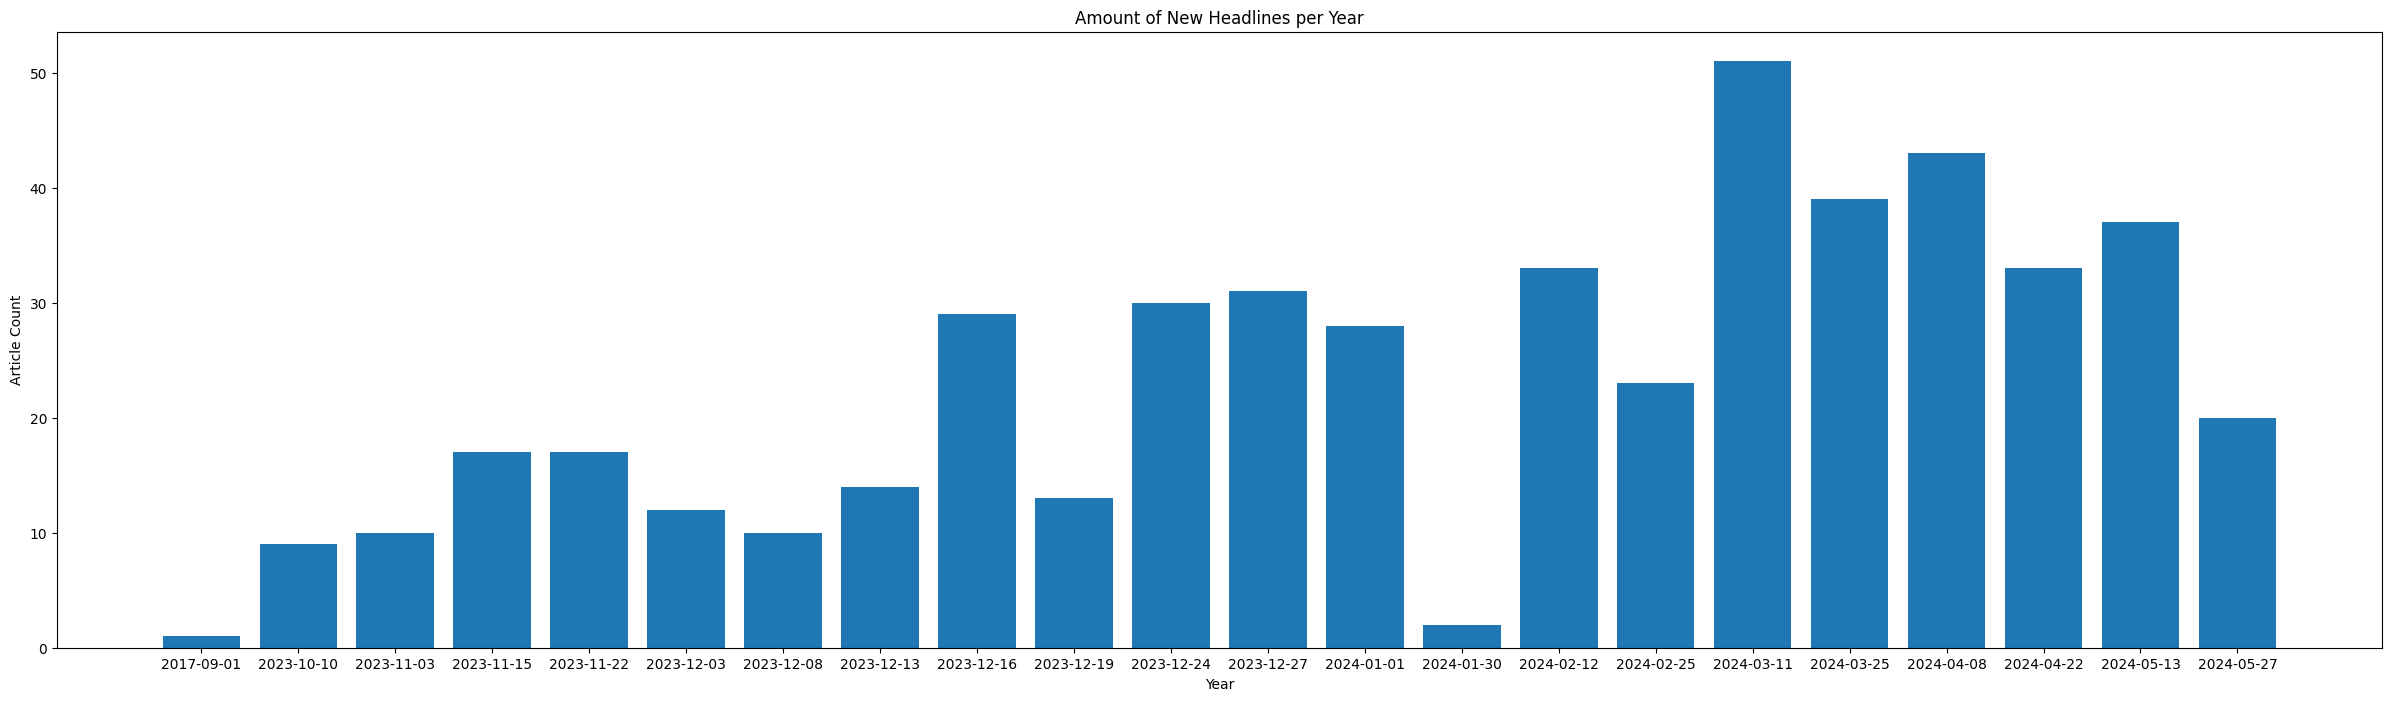

In [30]:
import matplotlib.pyplot as plt

# Örnek veri (n_data DataFrame'inizi burada tanımlayın)
# year sütununda yıllık veriler olduğunu varsayıyoruz
# n_data = pd.DataFrame({'year': [...]})  # n_data'nızın tanımını buraya ekleyin
df = df[df['pseudo_label']==1]
df = df[df['pseudo_label']==0]

# yearly_d hesaplama
yearly_d = df['date'].value_counts().sort_index()

# Bar grafiği oluşturma
fig, ax = plt.subplots(figsize=(30, 8))  # fig boyutlarını genişleterek ayarlama
ax.bar(yearly_d.index, yearly_d.values)

# Grafiğin başlıklarını ve eksen etiketlerini ayarlama
ax.set_title('Amount of New Headlines per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Article Count')

# Grafiği gösterme
plt.show()


In [96]:
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("turkish")
stopwords1 = ['bir', 'nin', 'olan', 'göre',
              'bin', 'kadar', 'olduğu', 'nın',
              'tarafından', 'devam','yer', 
              'önce','olduğunu','ilk','aynı','yüzde', 'nedeniyle', 'Bu', 'kemik', '2',
              'olarak', 'fazla','son','milyon','var', 'Başkanı', 'Belediye' ,
              'yıl','yeni', 'ancak','açıklamada','geçen','genel','halt','hak'
              'iki','ilgili', 'deki','den','etti','oldu','diğer','yen', 'hal','altı','orta',
              'değil','kendi','sonra','gelen',',','iyi', 'birlikte','şekilde','ardından',
              'arasında','eden', 'yönelik', 'üzere', 'zaman','ilişkin', 'alt', 'Aras', 'Açıklamak','Binmek'
              'başkanı','gün','ekim','kasım','yüksek','milyar','büyük','yapılan','sahip','olmak',
              'üzerinde', 'sadece','karşı', 'içinde', 'farklı', 'tek','dan', 'kişi','caddesi','alan',
                'yılın', 'nun', 'oranı','hakkında','yılında','eylül', 'bunun','uzun','bugün', 'yemek','başka', 'genelmek', 'söz',
              'yüz', ' ', '“', '”', 'etmek', 'yılmak', 'yapmak' ,'ilmek', 'demek', 'almak', 'ara', 'bun', 'sağ','ala',
              'yermek' ,'Kadar','belirmek','şirket','gelmek','varmak','açıklama','vermek','çalışmak','konu','üzeri','ifade',
              'ben', 'durum', 'art', 'haber', 'azalmak', 'yan', 'açık', 'karmak', 'döne', 'par','söylemek','önem','yük','ilgi'
              ,'saat','kul','başlamak','kalmak','etki','kas','insan','ilişki','bölge','ilgi','yok','sıra','şekil','yok','ayn',
              'yol','baş','bulunmak','görmek', 'hafta','yaşamak','Deva','yapılanmak','hayat','ön','is','istemek','İlgi', 'iç', 'imek','binmek','Gerçek','iki','faz'
             ]
STOPWORDS = stopwords+stopwords1
df=pd.read_csv('trainedilmis.csv')
df = df[df['pseudo_label'] != 0 ]

df['date'] = df['date'].replace({
    '2022-2023Q2': '2023-10-10',
    '2017': '2023-09-01',
    '11-3-2023':'2023-11-03',
    '11-15-2023':'2023-11-15',
    '11-22-2023':'2023-11-22',
    '12-08-2023':'2023-12-08',
    '12-03-2023':'2023-12-03',
    '12-16-2023':'2023-12-16',
    '01-09-2023':'2023-09-01',
    '12-13-2023':'2023-12-13',
    '12-19-2023':'2023-12-19',
    '12-27-2023':'2023-12-27',
    '12-24-2023':'2023-12-24',
    '05-13-2024':'2024-05-13',
    '05-20-2024':'2024-05-20',
    '05-27-2024':'2024-05-27',
    
})
df['month'] = pd.DatetimeIndex(df['date']).month
monthly= df.groupby(['month'], as_index = False).agg({'content': ' '.join})
monthly_n1 =[]
monthly_n2 =[]
monthly_n3=[]

yearly_word_freqs = []
for month in tqdm(monthly.month):
    F = nltk.FreqDist([i for i in ' '.join(df.query(f'month=={month}').content).split() if i not in STOPWORDS])
    yearly_word_freqs.append(F)
    result = [i for i in F.most_common(3)]
    monthly_n1.append(result[0])
    monthly_n2.append(result[1])
    monthly_n3.append(result[2])
    



[nltk_data] Downloading package stopwords to /home/mehmet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|█████████████████████████████████████████████| 9/9 [00:02<00:00,  3.96it/s]


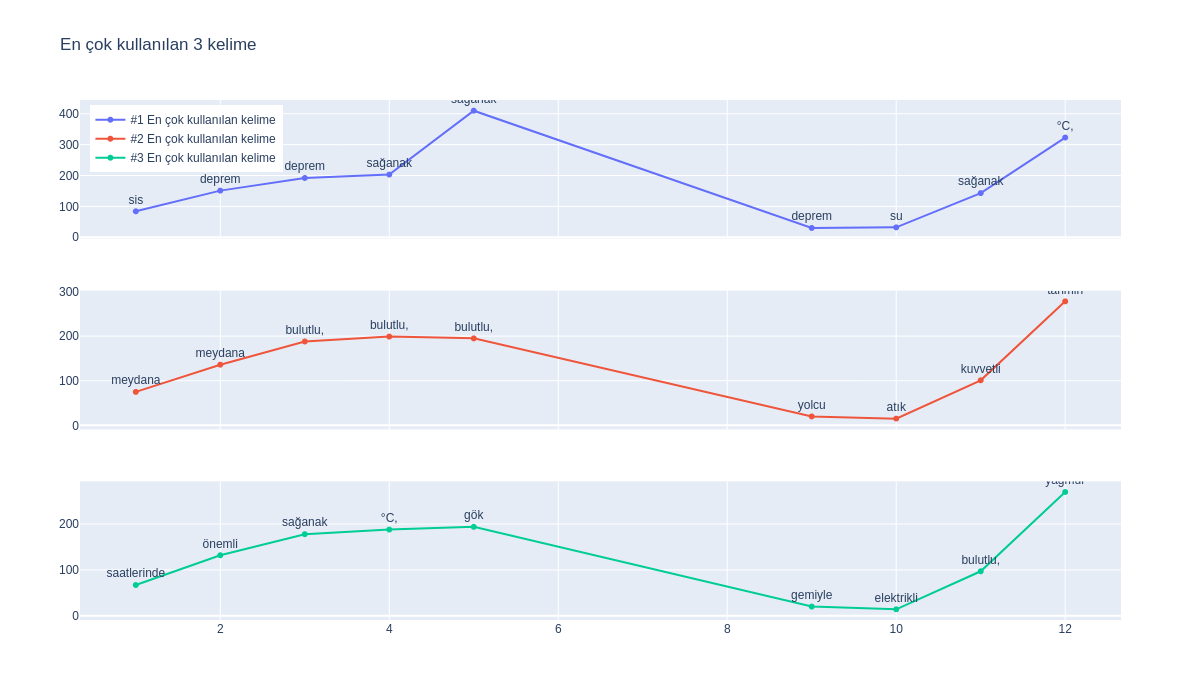

In [98]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=3, cols=1,shared_xaxes=True)#,subplot_titles=(f'{scope}ly Deviation in Positive Sentiment',  f'{scope}ly Deviation in Negative Sentiment'))

for i,dt in zip(range(3),[monthly_n1,monthly_n2, monthly_n3]):
    words  = [i[0] for i in dt]
    counts = [i[1] for i in dt]
    fig.add_trace(go.Scatter(x=monthly.month,y=counts,text=words,mode="lines+markers+text",textposition="top center"
    ,name=f'#{i+1} En çok kullanılan kelime'),row=i+1,col=1)



#fig['layout']['xaxis2']['title'] = scope
fig.update_layout(height=700, width=900, title_text="En çok kullanılan 3 kelime")


fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()